## Logistic Regression
- $z = {ax_1}+{bx_2}+{cx_3}+{dx_4}+{ex_5}+{𝑓}$
- ${𝑓}$: 범위는 -${∞}$ 부터 ${∞}$
- 선형 회귀식을 활용해 학습하는 분류 모델
- 특성 간의 관계를 보여주고, 특정 결과의 확률을 계산
- 정확한 예측 값을 도출하는데 사용

### Practice
- Using **`pandas`** library
- Read URL of CSV file
- What is a dataframe?
- Using method **`head()`**
- Using **`unique()`**
- Using **`train_test_split()`**
- Create Train-set and Test-set
- Using **`classes_`**
- Using **`np.round()`**
- Using **`decimals=_number`**
- Using **`kneighbors()`**, slicing
- Draw a Graph of Sigmoid Function
- Perform binary classification with LogisticRegression
- Using scipy of **`expit()`**
- Extracting only a few samples of the entire training data
- Perform multiple classifications using LogisticRegression
- Using scipy of **`softmax()`**



### 1. Prepare to data by reading CSV file
- import pandas
- Using **`pd.read_csv()`**

In [ ]:
import pandas as pd

fish = pd.read_csv("https://bit.ly/fish_csv_data")
print(fish) #fish datas

    Species  Weight  Length  Diagonal   Height   Width
0     Bream   242.0    25.4      30.0  11.5200  4.0200
1     Bream   290.0    26.3      31.2  12.4800  4.3056
2     Bream   340.0    26.5      31.1  12.3778  4.6961
3     Bream   363.0    29.0      33.5  12.7300  4.4555
4     Bream   430.0    29.0      34.0  12.4440  5.1340
..      ...     ...     ...       ...      ...     ...
154   Smelt    12.2    12.2      13.4   2.0904  1.3936
155   Smelt    13.4    12.4      13.5   2.4300  1.2690
156   Smelt    12.2    13.0      13.8   2.2770  1.2558
157   Smelt    19.7    14.3      15.2   2.8728  2.0672
158   Smelt    19.9    15.0      16.2   2.9322  1.8792

[159 rows x 6 columns]


### 2. What is a dataframe?
- pandas 라이브러리에서 제공되는 2차원 테이블 형식의 데이터 구조
- numpy 배열과 유사하게 column과 row로 구성
- 통계나 그래프를 위한 다양한 메소드 제공

### 2-2. Convert to dataframe
- **`[Species, Weight, Length, Diagonal, Height, Width]`**: row
- **`0, 1, 2, 3, 4`**: Column(Index)

In [ ]:
fish.head() #fish dataframe

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


### 2-3. Extract unique values from specific columns
- **`unique()`**: 특정 열에 대한 고유한 값을 추출 가능

In [ ]:
print(pd.unique(fish['Species'])) #Species values

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


### 2-4. Create new feature
- Species 열을 제외한 나머지 특성으로 새로운 numpy 배열 생성

In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

#Checkout
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


### 2-5. Create a train target
- Species 열 선택 후 [](대괄호) 중첩 주의할 것
  - 2차원 배열로 생성됨

In [ ]:
fish_target = fish['Species'].to_numpy()

#Checkout
print(fish_target)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'

### 3. Create a Train-set and Test-set
- import sklearn.model_selection
- Using train_test_split()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

#Checkout 5instances
print(train_input[:5])
print(test_input[:5])

[[720.      35.      40.6     16.3618   6.09  ]
 [500.      45.      48.       6.96     4.896 ]
 [  7.5     10.5     11.6      1.972    1.16  ]
 [110.      22.      23.5      5.5225   3.995 ]
 [140.      20.7     23.2      8.5376   3.2944]]
[[ 78.      18.7     19.4      5.1992   3.1234]
 [ 13.4     12.4     13.5      2.43     1.269 ]
 [200.      32.3     34.8      5.568    3.3756]
 [270.      26.      28.7      8.3804   4.2476]
 [150.      23.      24.5      5.2185   3.626 ]]


### 4. Scale standardization
- import sklearn.preprocessing
- Using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

#create a StandardScaler object
ss = StandardScaler()
ss.fit(train_input)

#train-set, test-set 표준화
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#Checkout
print(train_scaled)
print(test_scaled)

[[ 9.19657820e-01  6.09431747e-01  8.10412209e-01  1.85194896e+00
   1.00075672e+00]
 [ 3.00412188e-01  1.54653445e+00  1.45316551e+00 -4.69816625e-01
   2.72917446e-01]
 [-1.08585360e+00 -1.68646987e+00 -1.70848587e+00 -1.70159849e+00
  -2.00447580e+00]
 [-7.97341433e-01 -6.08801762e-01 -6.74869070e-01 -8.24805885e-01
  -2.76314705e-01]
 [-7.12898847e-01 -7.30625113e-01 -7.00926637e-01 -8.02298036e-02
  -7.03386897e-01]
 [-9.12746301e-01 -9.64900787e-01 -9.52816444e-01 -8.80171862e-01
  -9.91535662e-01]
 [-7.97341433e-01 -7.02512032e-01 -7.61727625e-01 -7.82824547e-01
  -5.44530184e-01]
 [ 6.38182533e-01  5.62576612e-01  7.32239510e-01  1.64473401e+00
   5.07057367e-01]
 [-7.41046376e-01 -6.74398951e-01 -7.35670058e-01 -6.12059278e-01
  -5.57331377e-01]
 [-8.67710255e-01 -7.96222301e-01 -8.92015456e-01 -9.33586942e-01
  -1.02183182e+00]
 [ 8.21141469e-01  7.49997152e-01  6.71438522e-01  4.98470601e-01
   1.47257213e+00]
 [ 3.00412188e-01  2.34590667e-01  4.28234570e-01  1.36042157e+00

### 5. Predicting the Probability of the K-NN Classifier
- import sklearn.neighbors
- Using KNeighborsClassifier
  - **`n_neighbors`**
    - 최근접 이웃 개수 지정
  - **`classes_`**
    - 분류 모델의 분류 타겟 지정
    - 자동 순서 정렬 출력

### 5-1. Import KNeighborsClassifier
- from sklearn.neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

### 5-2. Start to fit
- Use **`n_neighbors(default=5)`**
- Use **`fit()`**

In [ ]:
kn = KNeighborsClassifier(n_neighbors=3) #최근접 이웃 개수 3으로 지정
kn.fit(train_scaled, train_target)

KNeighborsClassifier(n_neighbors=3)

### 5-3. Check the scores
- 표준화 처리된 train_scaled, test_scaled 평가 수치 확인

In [ ]:
#Checkout
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


### 5-4. Comparison **`unique()`** and **`classes_`**

In [ ]:
print(pd.unique(fish['Species'])) #Species values
print(kn.classes_) #classes values (sorted)

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


### 6. Analyze result of the K-NN Classifier
- Using K-NN Classifier
  - **`predict()`**
    - 입력 샘플에 대한 예측값 반환
  - **`predict_proba()`**
    - 입력 샘플에 대한 예측된 타겟 별 확률을 반환
    - **`classes_`** 속성의 순서와 동일하게 출력 
  - **`np.round()`**
    - 소수점 첫째 자리에서 반올림
  - **`decimals=_number`**
    - 유지할 소수점 아래 자릿수 지정
    - 만약, 4로 지정한다면 소수점 4자릿수 까지 출력

In [ ]:
print(kn.predict(test_scaled[:5]))

#Use predict_proba()
#5개 샘플에 대한 확률 예측
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


### 6-1. Using kneighbors() for predicting
- 2차원 배열을 사용해야 하므로 넘파이 배열의 슬라이싱 연산자를 사용
- 슬라이싱 연산자는 하나의 샘플만 선택해도 2차원 배열이 자동으로 생성됨

In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes]) #결과적으로 0.6667의 확률로 'Perch'

[['Roach' 'Perch' 'Perch']]


### 7. Draw a Graph of Sigmoid Function
- import matplotlib.pyplot
- Using **`np.exp()`**
- 로지스틱 함수
- $z$가 무한히 작은 음수일 때 $0$에 가까워지고, 무한히 큰 양수일 때 $1$에 가까워짐
- 만약, $z$가 $0$이라면 $0.5$의 함수 값을 가지게 됨
- ${Ø}=$ ${1}\over 1+e^-{ᶻ}$

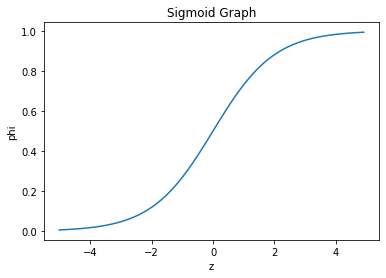

In [ ]:
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1) #-5에서 5 사이에 0.1 간격으로 z배열을 생성, -5..-4.9..-4.8...5
phi = 1 / (1 + np.exp(-z)) #Sigmoid 함수 공식
plt.title("Sigmoid Graph")
plt.plot(z, phi)
plt.xlabel("z")
plt.ylabel("phi")
plt.show()

### 8. Perform binary classification with LogisticRegression

- Using Boolean indexing
  - 원하는 원소에 대해 True 반환, 원하지 않는 원소는 False 반환 유도

In [ ]:
bream_smelt_indexes = (train_target == "Bream") | (train_target == "Smelt")
print(bream_smelt_indexes)

[ True False  True False False False False  True False False False  True
 False False False  True  True False False  True False  True False False
 False  True False False  True False False False False  True False False
  True  True False False False False False  True False False False False
 False  True False  True False False  True False False False  True False
 False False False False False  True False  True False False False False
 False False False False False  True False  True False False  True  True
 False False False  True False False False False False  True False False
 False  True False  True False False  True  True False False False False
 False False False False  True  True False False  True False False]


### 8-1. Extracting only a few samples of the entire training data
- bream_smelt_indexes 활용으로 클래스 중 Bream, Smelt 샘플만 추출

In [ ]:
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

### 8-2. Import LogisticRegression
- from sklearn.linear_model
- Use **`fit()`**
- Use **`predict()`**
- Use **`classes_`**
- Use **`coef_`, `intercept_`**
- Use **`decision_function()`**
- Use **`predict_proba()`**

In [ ]:
from sklearn.linear_model import LogisticRegression

#로지스틱 회귀 모델 생성
lr = LogisticRegression()
#모델 훈련
lr.fit(train_bream_smelt, target_bream_smelt)
#모델 타겟별 예측 확률 반환
print(lr.predict_proba(train_bream_smelt))
#정렬된 타겟 반환
print(lr.classes_) #[0]: 양성 클래스, [1]: 음성 클래스
#계수와 절편 값 출력 
print(lr.coef_, lr.intercept_)

[[9.97598548e-01 2.40145188e-03]
 [2.73518278e-02 9.72648172e-01]
 [9.94860716e-01 5.13928355e-03]
 [9.85842021e-01 1.41579793e-02]
 [9.97672689e-01 2.32731108e-03]
 [3.19313332e-02 9.68068667e-01]
 [9.73126218e-01 2.68737821e-02]
 [9.99532898e-01 4.67102003e-04]
 [9.86833271e-01 1.31667287e-02]
 [9.02298747e-01 9.77012526e-02]
 [9.98451570e-01 1.54842979e-03]
 [9.97613093e-01 2.38690672e-03]
 [9.96916198e-01 3.08380199e-03]
 [3.78088229e-02 9.62191177e-01]
 [9.99594536e-01 4.05464246e-04]
 [3.34216952e-02 9.66578305e-01]
 [7.48145922e-02 9.25185408e-01]
 [9.79921012e-01 2.00789881e-02]
 [9.99386077e-01 6.13922873e-04]
 [9.71082465e-01 2.89175350e-02]
 [9.81843741e-01 1.81562588e-02]
 [9.84919698e-01 1.50803021e-02]
 [9.62792981e-01 3.72070191e-02]
 [9.93461181e-01 6.53881937e-03]
 [9.85713675e-01 1.42863252e-02]
 [3.97252439e-02 9.60274756e-01]
 [9.95687200e-01 4.31280005e-03]
 [3.41396040e-02 9.65860396e-01]
 [3.21494398e-02 9.67850560e-01]
 [9.40631080e-01 5.93689204e-02]
 [7.667674

In [ ]:
decisions = lr.decision_function(train_bream_smelt)
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117   3.41171526
 -3.58936263 -7.66849569 -4.31680801 -2.22303129 -6.46896427 -6.03536725
 -5.77850347  3.23667067 -7.81007231  3.36455707  2.51498121 -3.88779807
 -7.39502714 -3.51396324 -3.99041683 -4.17917072 -3.25334099 -5.02343836
 -4.23406312  3.1852326  -5.4418458   3.34256119  3.40468267 -2.76278015
  2.48838097 -5.2065086  -4.77314052]


### 9. Using scipy of **`expit()`**
- **`expit()`**
  - sipy 라이브러리에서 제공하는 시그모이드 함수
  - **`np.exp()`**보다 편리하고 안전

In [ ]:
from scipy.special import expit
#양성 클래스에 대한 z값 반환
print(expit(decisions))

[2.40145188e-03 9.72648172e-01 5.13928355e-03 1.41579793e-02
 2.32731108e-03 9.68068667e-01 2.68737821e-02 4.67102003e-04
 1.31667287e-02 9.77012526e-02 1.54842979e-03 2.38690672e-03
 3.08380199e-03 9.62191177e-01 4.05464246e-04 9.66578305e-01
 9.25185408e-01 2.00789881e-02 6.13922873e-04 2.89175350e-02
 1.81562588e-02 1.50803021e-02 3.72070191e-02 6.53881937e-03
 1.42863252e-02 9.60274756e-01 4.31280005e-03 9.65860396e-01
 9.67850560e-01 5.93689204e-02 9.23323258e-01 5.45090074e-03
 8.38292167e-03]


In [ ]:
#Checkout
print(lr.predict_proba(train_bream_smelt[:5]))
print(expit(decisions))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
[2.40145188e-03 9.72648172e-01 5.13928355e-03 1.41579793e-02
 2.32731108e-03 9.68068667e-01 2.68737821e-02 4.67102003e-04
 1.31667287e-02 9.77012526e-02 1.54842979e-03 2.38690672e-03
 3.08380199e-03 9.62191177e-01 4.05464246e-04 9.66578305e-01
 9.25185408e-01 2.00789881e-02 6.13922873e-04 2.89175350e-02
 1.81562588e-02 1.50803021e-02 3.72070191e-02 6.53881937e-03
 1.42863252e-02 9.60274756e-01 4.31280005e-03 9.65860396e-01
 9.67850560e-01 5.93689204e-02 9.23323258e-01 5.45090074e-03
 8.38292167e-03]


### 10. Perform multiple classifications using LogisticRegression
- Using **`C`**
  - 기본값은 1이며, L2 규제의 값을 지정해 규제의 강도를 조절 가능
  - 값이 증가할 수록 규제는 완화, 값이 감소할 수록 규제는 강화
- Using **`max_iter=`**
  - 준비한 데이터 세트에 대해 학습을 얼마나 반복할지 지정
  - 지정한 값이 클수록 반복 학습


In [ ]:
lr = LogisticRegression(C=20, max_iter= 1000) #L2 규제 20/1000번 반복 학습
lr.fit(train_scaled, train_target)

LogisticRegression(C=20, max_iter=1000)

In [ ]:
#result score
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
#테스트 세트의 5개 샘플에 대한 예측
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
#테스트 세트의 5개 샘플에 대한 예측 확률
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


### 11. Softmax Function
- ${esum}= {e^z}^1+{e^z}^2+{e^z}^3+{e^z}^4+{e^z}^5+{e^z}^6+{e^z}^7$
- ${s1}=$${e^z}^1\over esum$, ${s2}=$${e^z}^2\over esum$,$....$, ${s7}=$${e^z}^7\over esum$
- 여러 개의 선형 방정식의 출력값을 0~1 사이로 압축해 전체 합을 1로 만듬
- 따라서 정규화된 지수 함수라고 말할 수 있다
- 분모를 모두 더한 값을 분모로 나누어 주는 방식

In [ ]:
#5개 샘플
decision = lr.decision_function(test_scaled[:5])

print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


### 11-1. Using scipy of **`softmax()`**
- **`softmax()`**
  - sipy 라이브러리에서 제공하는 소프트맥스 함수
  - **`axis=`**: 각 행, 다시말해 각 샘플에 대해 계산하기 위해 축 지정 필요

In [ ]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
